# Basic Mathematical Finance Conventions
* The possible states of the world in an unknown future can be modeled as a vector e.g. ${v = \begin{pmatrix} 
v^{u} \\ 
v^{d} \end{pmatrix}\in \mathbb{R_{+}^2}}$
* Risk-free return is return with 0 variance - the return = the mean with a variance and standard deviation of 0. With cost of capital lower than this risk-free return, this is always the ultimate investment.

# Basic Financial Economics
* **Real Assets**: A chicken egg or a machine
* **Agents**: Human being active in the economy
* **Time**: Time is discretized for the purposed of Financial Engineering. In a two state economy, only two times exist: "Now" and "Future"
* **Money**: The *numeraire* is one unit of generic currency. All goods are experessed in multiples or fractions of this unit.
* **Cash Flow**: Cash flow combines *time* with *currency*. An investment cycle is defined as *a cash outflow with a negative value and a payback with a positive value*
* **Rate of Return**: In an interest free world, just the sum of cash flows divided by the absolute value of the investment leg
* **Simple Interest**: Assume a risk-free rate that pays a percentage of fund invested at time T.
* **Time Value of Money**: The value of a cash flow available in a year with a given investment is discounted by its interest rate to provide the value of that cash today 

In [1]:
# Rate of Return
investment = -10
payback = 18
def rate_of_return(investment, payback):
    return (investment + payback) / abs(investment)
rate_of_return(investment, payback)

0.8

In [3]:
# Time Value of Money
def tvm(investment, r):
    return investment / (1 + r)
tvm(100, 0.05)

95.23809523809524

Text(0.5, 0, 'Interest Rate')

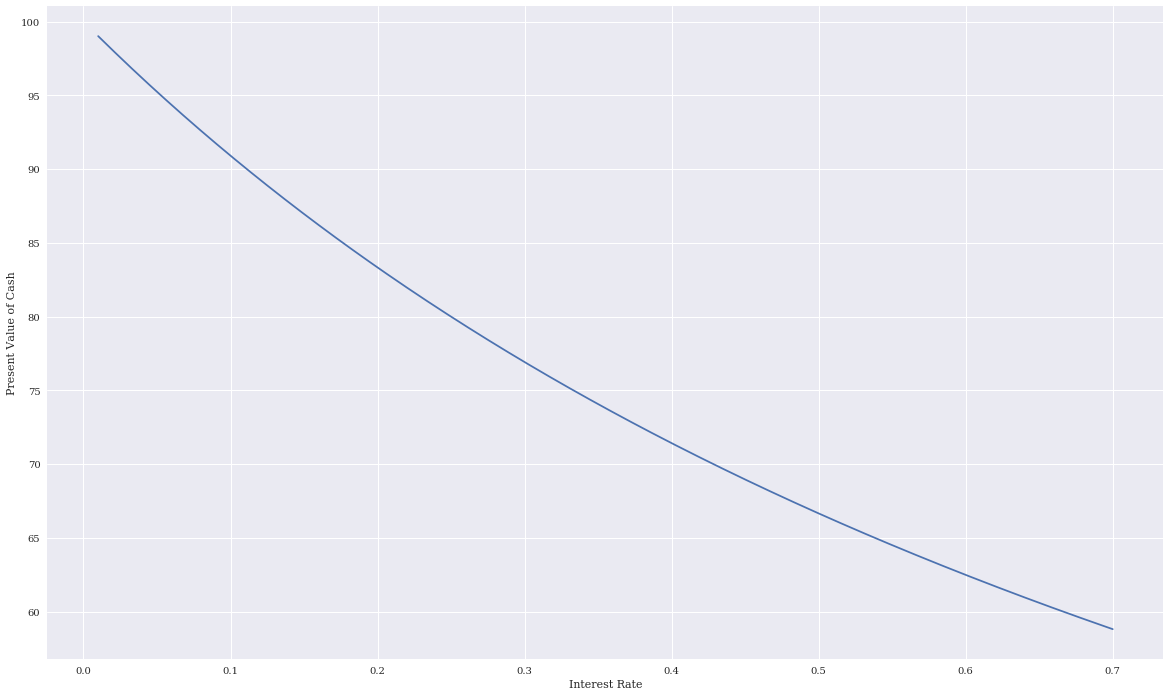

In [6]:
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
tvm_strap = np.linspace(0.01, 0.7, 300)
valuations = []
for rate in tvm_strap:
    valuations.append(tvm(100, rate))
plt.figure(figsize=(20,12))
plt.plot(tvm_strap, valuations)
plt.ylabel('Present Value of Cash')
plt.xlabel('Interest Rate')

# Net Present Value
* Net Present Value is the sum of the investment outlays today and the discounted future cash flows

In [18]:
def net_present_value(cash_flow_tuple):
    return cash_flow_tuple[0] + tvm(cash_flow_tuple[1], 0.1)
net_present_value((-20, 29))

6.36363636363636

# Expectation
* The expected value of a given asset at time T is the sum of the probability vector and the return vector of assets in the probability space: ${E^{P} = \sum_{\omega \in \Omega} P(\omega) \dot S_{1}^{\omega}}$
* The expected return is denoted as ${\mu}$

In [41]:
probabilities = np.array([0.4, 0.6])
return_rates = (returns - 10) / 10
expected_return = np.dot(probabilities, return_rates) # Dot product of probability and return vector
expected_return

0.10000000000000003

# Volatility
* Variance is the dot product of the probabilities of returns and difference of return rates and expectd return squared
* Volatility is the standard deviation of the return rate


In [36]:

return_rates

array([ 1. , -0.5])

In [44]:
def compute_variance(probabilities, return_rates, expected_return):
    return np.dot(probabilities, (return_rates - expected_return) ** 2) # Variance
variance = compute_variance(probabilities, return_rates, expected_return)
variance

0.54

In [47]:
def compute_volatility(probabilities, return_rates, expected_return):
    return np.sqrt(np.dot(probabilities, (return_rates - expected_return) ** 2)) # Variance
volatility = compute_volatility(probabilities, return_rates, expected_return)
volatility

0.7348469228349535

# Derivatives & Contingent Claims
* An option with a payoff claim at some point in the future - see main Stochastics note book and `TODO` dedicated option pricing chapter
* All derivatives can be replicated by a combination of buying some portion of the underlying while simultaneously selling the risk-free bond - othewise arbitrage exists
* An example of the system of equations set up for the risk-free replication: ${\begin{pmatrix} 
11b + 20s = 5\\ 
11b + 5s = 0 \end{pmatrix}}$

In [64]:
B = (10, np.array((11, 11))) # the bond is worth the same in both future states of the world
S = (10, np.array((20, 5))) # the stock is worth different amounts in both future states of the world
M = np.array((B[1], S[1])).T
K = 15 # Strike
C1 = np.maximum(S[1] - K, 0)
C1
phi = np.linalg.solve(M, C1) # Solve system of equations
phi

array([-0.15151515,  0.33333333])

In [72]:
(phi[0] * M[0, 0]) + (phi[1] * M[0, 1]) # Correct!

5.0

In [74]:
(phi[0] * M[1, 0]) + (phi[1] * M[1, 1]) # Correct!!!

0.0

# Arbitrage Pricing
* The value of the replication portfolio today can be ascertained once the optimal replication worfolio weights are known - from the dot product ${V{0} = b • B_{0} + s • S_{0}}$
* If the contingent claim price differes from this dot product there is an arbitrage opportunity available. (e.g. if option cost 2, short it and buy the replication portfolio for an immediate risk-free profit)

In [77]:
B[0] * phi[0] + S[0] * phi[1]

1.8181818181818181

# Complete Market Model
* All this means is that there is a linear combination of assets that replicates any contingent claim in ${\mathbb{R}^N}$

# Arrow-Debreu Securities
* All this means is a simple security that pays 1 numeraire at some point in the future
* In the 2-space, Arrow-Debreu looks like ${\begin{pmatrix} 
1 & 0\\ 
0 & 1 \end{pmatrix}}$
* The use of the securities is to form the standard basis/coordinates for the arbitrage-free vector space

# Martingale Measure
* All this means is that all contingent claims are exactly equal to their risk-discounted expected value.
* If they weren't, there would be arbitrage
* Though IRL - who can predict the future? So unless you set exact contract terms and counterparty doesn't realize it, this isn't of much use

# First Fundamental Theorem of Asset Pricing
1. A martingale measure exists
2. The economy is arbitrage free

# Martingale Pricing
* All this means is that all claims can be priced by discounting their expected future value by the risk-free rate
* Otherwise, arbitrage

# Second Fundamental Theorem of Asset Pricing
1. The martingale measure is unique
2. The market model is complete (meaning all claims can be priced as linear combinations of assets)

# Mean-Variance Portfolios
* This formalizes the idea of "Higher Risk, Higher Return"
* A financial asset can be viewed simply as its first and second moments: the **mean** and **standard deviation** or **variance**
* This means the expected return of the portfolio is simply the percentages invested in each asset times its expected return in future universe states
* The standard deviation of the portfolio is the standard deviation of the scalar allocation to stocks * the expected return vector
* This leads to a frontier where the standard deviation of the portfolio increases monotonically with the allocation to stocks

In [14]:
import numpy as np
values = np.linspace(0, 1, 25)
B = (10, np.array((11, 11)))
S = (10, np.array((20, 5)))
M = np.array((B[1], S[1])).T
M0 = np.array((B[0], S[0])) 
R = M / M0 - 1
P = np.array((0.5, 0.5)) # Probability of up state or down state
mu = [np.dot(((1-s), s), np.dot(P, R))
                for s in values]
sigma = [s * R[:, 1].std() for s in values]
# B = (10, np.array((11, 11))) # Bond price now and in both futures
# S = (10, np.array((20, 5))) # Security price now and in both futures
# M = np.array((B[1], S[1])) # Matrix of prices of both and in both future states
# M0 = np.array((B[0], S[0])) # Vector of prices of both in initial state
# s = 0.55 # Initial stock allocation
# phi = (1-s, s) # Vector of bond/stock allocation
# R = M / M0 - 1
# 
# mu = [np.dot(((1-s), s), np.dot(P, R))
#                 for s in values] # Expected return for various stock % allocations
# sigma = [s * R[:, 1].std() for s in values] # Expected volatility for stock % allocations
M

array([[11, 20],
       [11,  5]])

Text(0, 0.5, 'Expected Return/Volatility %')

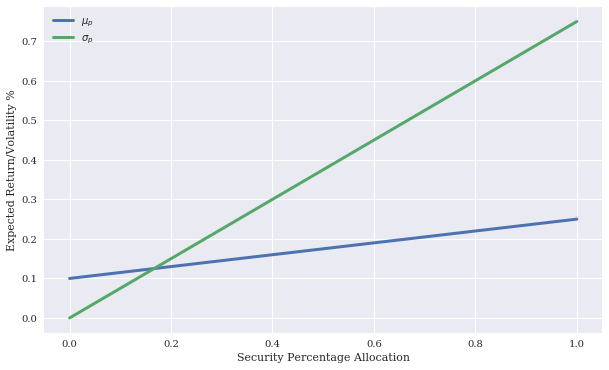

In [16]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(values, mu, lw = 3.0, label='$\mu_p$')
plt.plot(values, sigma, lw = 3.0, label='$\sigma_p$')
plt.legend(loc=0)
plt.xlabel('Security Percentage Allocation');
plt.ylabel('Expected Return/Volatility %')

Text(0, 0.5, 'Return')

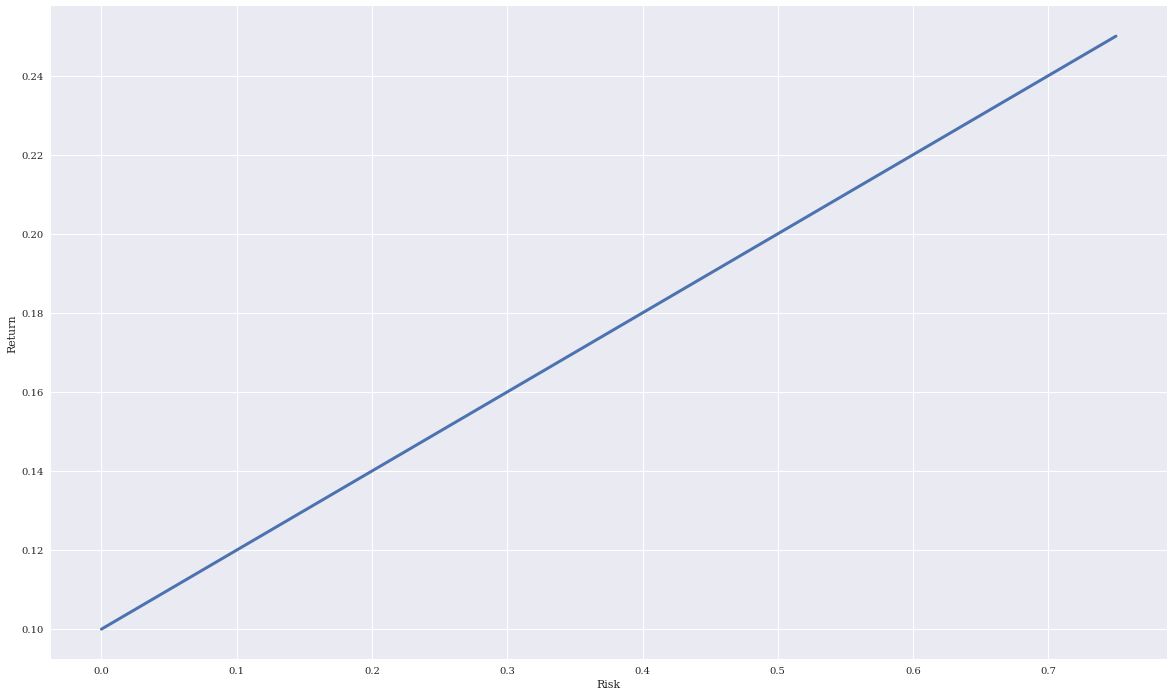

In [18]:
# Finally, plotting risk against return
plt.figure(figsize=(20,12))
plt.plot(sigma, mu, lw =3.0, label='risk-return')
plt.xlabel('Risk')
plt.ylabel('Return')

# Three State Economy
* "The model is complete if every claim X can be replicated by some trading strategy. If you cannot, the model is **incomplete**
* A Three state economy keeps the number of traded assets at 2 but sets up three future states
* In this economy, that state space expands to ${\Omega = \{u, m, d\}}$ and the power set of that space is ${P(\Omega) = \{(u), (m), (d), (u,m), (u,d), (m,d), \Omega\}}$
* The probability measure over the space is equal, ${P(\omega) = 1/3}$
* The space contains two assets, a bond with future value ${\begin{pmatrix} 
11\\ 
11 \\
11 \end{pmatrix}}$
and a stock with future value ${\begin{pmatrix} 
20 \\ 
10 \\
5\end{pmatrix}}$
* The market payoff ${M}$ is the matrix of these two vectors
* Because there are more future states than securities, the system has no unique solution, so introduces **indeterminancy**
* Geometrically - this means that the possible solutions to asest allocations span a plane within a cube - this makes sense because the securities are in ${\mathbb{R}^2}$ and the future economy is in ${\mathbb{R}^3}$

In [21]:
# Visualizing the assets + economy
import numpy as np
np.random.seed(100)
B = (10, np.array((11, 11, 11)))
B

(10, array([11, 11, 11]))